|<img style="float:left;" src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif" > |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|



# Chapitre 6: Facteurs de friction:

### 1 Définition 

>> ### Le facteur de friction est facteur de proportionnalité défini comme le rapport entre la force de friction exercée sur un objet par un fluide qui s'écoule sur cet objet d'une part, et le produit de l'énergie cinétique du fluide multipliée par la surface. 


 $ \boxed { { f  } = \frac {F_k}{A \frac {1}{2} \rho V^2}}$ 


>> ### a) Le facteur de friction défini pour l'écoulement dans une conduite devient ainsi: 


$\begin{equation*}
  \boxed{ f = \frac {F_k}{2 \pi R L \big( \frac {1}{2} \rho V^2\big)} }
  \end{equation*}$


$ V $ est la vitesse moyenne de l'écoulement dans la conduite. 

Par un bilan des forces qui s'exercent sur la conduite, on peut relier la force de friction à la différence de pression $\mathscr{P}_0 - \mathscr{P}_L$, et on obtient:


$\begin{equation}
\boxed {F_k = (\mathscr{P}_0 - \mathscr{P}_L)\pi R^2}
\end{equation}$


En substituant $F_k$ dans la définition de $f$, on obtient la définition générale du coefficient de friction pour une conduite circulaire:


$\begin{equation*}
  \boxed{ f =  \frac {1}{4} \frac {D}{L}\frac {\mathscr{P}_0 - \mathscr{P}_L} {(\frac {1}{2} \rho V^2)}} 
  \end{equation*}$


>> ### b) Le facteur de friction défini pour l'écoulement autour d'une sphère en chute libre : 
Le facteur de friction est toujours défini de la même façon


$ \boxed {f = \frac {F_k}{A \frac {1}{2} \rho v_\infty ^2}}$ 


mais ici, ** attention **, la surface A est la surface pprojetée de la sphère, donc la surface d'un disque, et $v_\infty $ est la vitesse relative entre le fluide et la sphère.

$\begin{equation*}
  \boxed{ f = \frac {F_k}{\pi R^2 \frac {1}{2} \rho v_\infty^2}}
  \end{equation*}$


Par un bilan des forces qui s'exercent sur la sphère (gravité - poussée d'Archimède), on obtient:


$\begin{equation}
\boxed {F_k = \frac {4}{3}\pi R^3 \rho_{sph} g - \frac {4}{3}\pi R^3 \rho g  }
\end{equation}$


En substituant $F_k$ dans la définition de $f$, on obtient la définition générale du coefficient de friction pour une sphère en chute libre:


$\begin{equation*}
  \boxed{ f =  \frac {4}{3} \frac {gD}{v_\infty ^2} \frac {\rho_{sph} -\rho} {\rho}} 
  \end{equation*}$


### 2. Facteur de friction pour une conduite


Le résultat obtenu à la section 1a)  est la définition du facteur de friction, ce facteur peut maintenant être déterminé si on connait le profil de vitesse. Il y a deux cas:

####  * Cas laminaire
$\begin{equation}
\boxed {f = \frac {16}{Re}}
\end{equation}$


####  * Cas turbulent

Malheureusement dans le cas turbulent le facteur de friction ne peut pas être déterminé en général de façon aussi simple que dans le cas laminaire et on doit utiliser souvent des corrélations empiriques telles que celles présentées à la section 6.2. Cependant, la relation de Blasius, bien qu'elle soit limitée à des écoulements à des nombres de Reynolds inférieurs à 100,000 et seulement pour des conduites lisses, est souvent utilisée:
$\begin{equation}
\boxed {f = \frac {0.0791}{Re^{0.25}}}
\end{equation}$

Pour des conduites rugueuses, la formule de Haaland est souvent proposée pour des écoulements fortement turbulents (Re>40,000)
$\begin{equation}
\boxed {\frac {1}{\sqrt{f}} = -3.6 log_{10} \bigg [ \frac {6} {Re} +\big (\frac {k/D}{3.7} \big)^{10/9} \bigg ] }
\end{equation}$


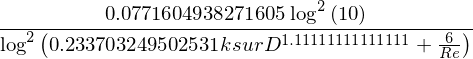

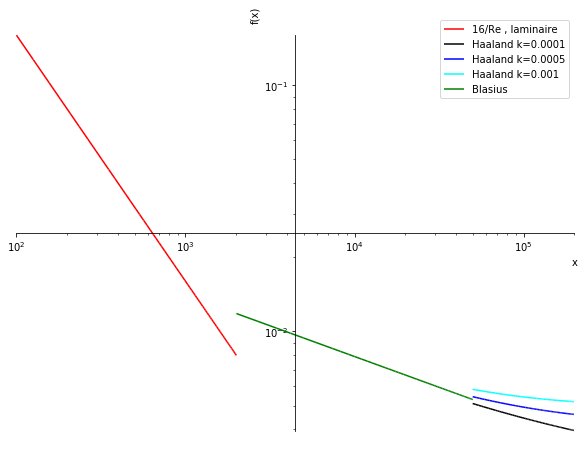

In [1]:
#
# Utilisons Sympy pour tracer et voir l'influence de Re et k/D, ainsi que la cohérence entre les 2 corrélations
# turbulente ainsi que la partie laminaire
#
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)
%matplotlib inline
Re,ksurD,f=sp.symbols('Re,ksurD,f')
f=sp.Eq(1/(-3.6*sp.log(6/Re+(ksurD/3.7)**(10/9),10))**2).lhs
display(f)
dico={'ksurD':0.0001}
f1=f.subs(dico)
dico={'ksurD':0.0005}                     # Turbulent avec rugosité
f2=f.subs(dico)
dico={'ksurD':0.001}
f3=f.subs(dico)
fBlasius=sp.Eq(0.0791/Re**0.25).lhs       # Turbulent jusqu'à 50,000 conduite lisse
fLam=sp.Eq(16/Re).lhs                     # laminaire, Re < 2000
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,8
p=sp.plot((fLam,(Re,100,2000)),
        (f1,(Re,50000,200000)),
        (f2,(Re,50000,200000)),
        (f3,(Re,50000,200000)),
        (fBlasius,(Re,2000,50000)),legend=True,xscale='log',yscale='log',show=False);
p[0].line_color = 'red'
p[0].label='16/Re , laminaire'
p[1].line_color = 'black'
p[1].label='Haaland k=0.0001'
p[2].line_color = 'blue'
p[2].label='Haaland k=0.0005'
p[3].line_color = 'cyan'
p[3].label='Haaland k=0.001'
p[4].line_color = 'green'
p[4].label='Blasius'
p.show()


## 3. Facteur de friction pour une sphère en chute libre


Le résultat obtenu dans la section 1b) est la définition du facteur de friction, ce facteur peut maintenant être déterminé si on connait le profil de vitesse autour de la sphère. La solution n'est pas unique, encore une fois, mais dépends du régime d'écoulement. 

####  * Régime de Stokes, pour des nombres de Reynolds très faibles ( < 1 ) 

Dans ce cas, le facteur de friction peut être obtenu:
$\begin{equation}
\boxed {f = \frac {24}{Re}}
\end{equation}$

####  * Régime intermédiaire,  ( 500 > Re  > 1  ) 

Dans ce cas, le facteur de friction peut être obtenu par:
$\begin{equation}
\boxed {f = \bigg ( \sqrt{\frac {24}{Re}} + 0.5407 \bigg )^2}
\end{equation}$

####  * Régime de Newton,  ( 100000> Re  >500 ) 

Expérimentalement on a trouvé que dans cette région le facteur de friction varie très peu:
$\begin{equation}
\boxed {f = 0.44}
\end{equation}$


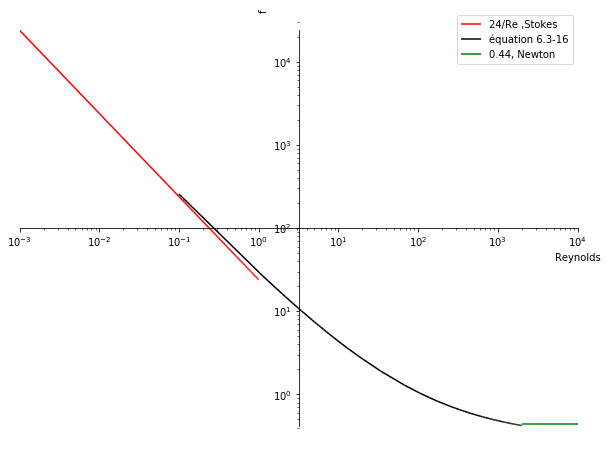

In [2]:
#
# Utilisons Sympy pour tracer et voir l'influence de Re et k/D, ainsi que la cohérence entre les 2 corrélations
# turbulente ainsi que la partie laminaire
#
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)
%matplotlib inline
Re,f=sp.symbols('Re,f')
f2=0.44
f1=((24/Re)**0.5+0.5407)**2
f=24/Re
plt.rcParams['figure.figsize'] = 10,8
p=sp.plot((f,(Re,0.001,1)),
        (f1,(Re,0.1,2000)),
        (f2,(Re,2000,10000)),
          legend=True,xlabel='Reynolds',ylabel='f',xscale='log',yscale='log',show=False);
p[0].line_color = 'red'
p[0].label='24/Re ,Stokes '
p[1].line_color = 'black'
p[1].label='équation 6.3-16'
p[2].line_color = 'green'
p[2].label='0.44, Newton'
p.show()

## 4. Facteur de friction dans un lit fixe

Le développement par Ergun (1952) d'une relation entre la différence de pression appliquée sur un lit fixe et le débit nous donne un outil assez facile à utiliser, en effet: 

####  * Régime d'Ergun,  ( 1000 > Re  >10 ) 


$\begin{equation*}
  \boxed{ \bigg ( \frac  {(\mathscr{P}_0 - \mathscr{P}_L) \rho} {G_0^2} \bigg )
  \bigg ( \frac  {D_p} {L} \bigg )
  \bigg ( \frac  {\epsilon^3} {1-\epsilon} \bigg )
  =
  150  \bigg ( \frac  {1-\epsilon} {D_p G_0/\mu} \bigg )
  +\frac {7}{4}
    }
  \end{equation*}$

Cette expression représente bien les résultats expérimentaux pour des valeurs de $\frac {D_p G_0} {\mu(1-\epsilon)}$ (le nombre de Reynolds corrigé pour la présence des particules dans le lit) entre 10 et 1000. 

####  * Régime de Blake-Kozeny,  ( 10 > Re  ) 

Si le nombre de Reynolds est inférieur à 10, on peut négliger le dernier terme à droite de l'équation d'Ergun:
$\begin{equation*}
  \boxed{ \bigg ( \frac  {(\mathscr{P}_0 - \mathscr{P}_L) \rho} {G_0^2} \bigg )
  \bigg ( \frac  {D_p} {L} \bigg )
  \bigg ( \frac  {\epsilon^3} {1-\epsilon} \bigg )
  =
  150  \bigg ( \frac  {1-\epsilon} {D_p G_0/\mu} \bigg )
    }
  \end{equation*}$

####  * Régime de Burke-Plummer,  (  Re > 1000 ) 

Si le nombre de Reynolds est supérieur à 1000, on peut négliger le premier terme à droite de l'équation d'Ergun:

$\begin{equation*}
  \boxed{ \bigg ( \frac  {(\mathscr{P}_0 - \mathscr{P}_L) \rho} {G_0^2} \bigg )
  \bigg ( \frac  {D_p} {L} \bigg )
  \bigg ( \frac  {\epsilon^3} {1-\epsilon} \bigg )
  =
 \frac {7}{4}
    }
  \end{equation*}$


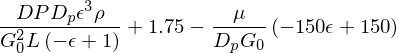

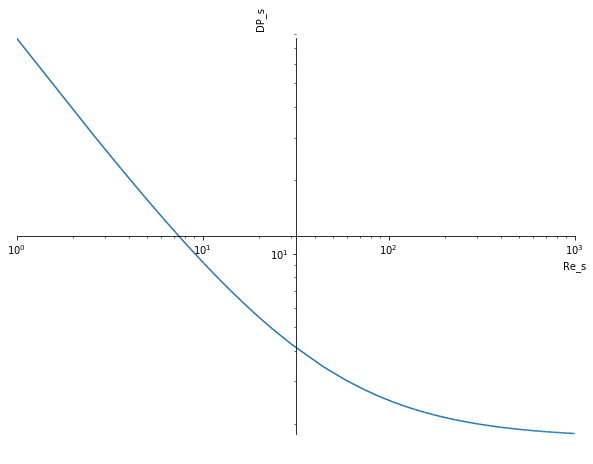

151.750000000000
1.00000000000000


In [3]:
#
# Utilisons Sympy pour tracer sous la même forme que dans Transport Phenomena Fig 6.4-2
#
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)
%matplotlib inline
DP,rho,G_0,D_p,epsilon,mu,L=sp.symbols('DP,rho,G_0,D_p,epsilon,mu,L')
Ergun=((DP)*rho/G_0**2)*(D_p/L)*(epsilon**3/(1-epsilon))-150*(1-epsilon)/(D_p*G_0/mu)+7/4
display(Ergun)
#
# C'est l'équation d'Ergun qu'on change de forme pour le graphe, Fig 6.4-2
#
Re=(D_p*G_0/mu)/(1-epsilon)
graphe=150/Re  +1.75                                       # voir 6.4-13
dico={'mu':0.001,'epsilon':0.5,'rho':1000,'D_p':0.001} 
graphe=graphe.subs(dico)
#
# DP_s et Re_s sont les abscisse et ordonnées de la figure 6.4-2 respectivement
#
plt.rcParams['figure.figsize'] = 10,8
sp.plot(graphe,(G_0,1,1000
               ),xscale='log',yscale='log',xlabel='Re_s',ylabel='DP_s');
#
# On imprime ici pour vérification avec la figure 6.4.2 la valeur de l'ordonnée
# pour une abscisse de 1, ce qui correspond à l'extrême gauche du graphe.
print(graphe.subs(G_0,.5))
Re=Re.subs(dico)
print(Re.subs(G_0,.5))
#
# On varie G_0 pour avoir les abscisses voulues